In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [54]:
def generateSubsets(n,scenario,sigma_A,sigma_B,verbose=0):
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])


    class_A=np.zeros((2,n))
    class_B=np.zeros((2,n))

    class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
    class_A[1]= np.random.randn(1,n)*sigma_A +mu_A[1]

    class_B[0]= np.random.randn(1,n)*sigma_B +mu_B[0]
    class_B[1]= np.random.randn(1,n)*sigma_B +mu_B[1]

    np.random.shuffle(class_A.T)
    np.random.shuffle(class_B.T)

    if scenario == 0:
        class_A_train=class_A[:,:int(0.5*n)]
        class_B_train=class_B[:,:int(0.5*n)]
        class_A_val=class_A[:,int(0.5*n):]
        class_B_val=class_B[:,int(0.5*n):]
        #print(class_A_train)
        #print(class_A_val)
        
        X=np.concatenate((class_A_train,class_B_train),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.concatenate((np.ones(class_A_train.shape[1]),-np.ones(class_B_train.shape[1])))

        X_val=np.concatenate((class_A_val,class_B_val),axis=1)
        X_val=np.concatenate((X_val,np.ones((1,X_val.shape[1]))))
        #print(X_val)
        T_val=np.ones((X_val.shape[1]))
        #T_val[class_A_val.shape[1]:class_B_val.shape[1]] = -1*T_val[class_A_val.shape[1]:class_B_val.shape[1]]
        
        T_val[class_A_val.shape[1]:] = -1
        #print(T_val)
    if scenario == 1:
        class_A_train=class_A[:,:int(0.5*n)]
        class_B_train=class_B
        class_A_val=class_A[:,int(0.5*n):]

        X=np.concatenate((class_A_train,class_B_train),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.concatenate((np.ones(class_A_train.shape[1]),-np.ones(class_B_train.shape[1])))

        X_val=np.concatenate((class_A_val,np.ones((1,class_A_val.shape[1]))))
        T_val=np.ones((X_val.shape[1]))

    if scenario == 3:
        mask_neg = class_A[1,:]<0
        mask_pos = class_A[1,:]>0
  
        class_A_train_neg = class_A[:,mask_neg]
        class_A_train_neg = class_A_train_neg[:,:int(0.2*class_A_train_neg.shape[1])]

        class_A_train_pos = class_A[:,mask_pos]
        class_A_train_pos = class_A_train_pos[:,:int(0.8*class_A_train_pos.shape[1])]
        
        X=np.concatenate((class_A_train_neg,class_A_train_pos),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.ones(X.shape[1])

        X_val = class_B
        X_val=np.concatenate((X_val,np.ones((1,X_val.shape[1]))))
        T_val=-np.ones((X_val.shape[1]))
        print(X_val)
        print(T_val)
    i = np.arange(X.shape[1])
    np.random.shuffle(i)
    X=X[:,i]
    T=T[i]


    i = np.arange(X_val.shape[1])
    np.random.shuffle(i)
    X_val=X_val[:,i]
    T_val=T_val[i]
    
    if verbose:
        #Plotting classes if desired
        if scenario == 3:
            #print(class_A_train_neg.shape)
            #print(class_A_train_pos.shape)
            plt_train_neg, = plt.plot(class_A_train_neg[0,:],class_A_train_neg[1,:],'g^', label='Class A(1,:)<0')
            plt_train_pos, = plt.plot(class_A_train_pos[0,:],class_A_train_pos[1,:],'bs', label='Class A(1,:)>0')
            plt_val, = plt.plot(class_B[0,:],class_B[1,:],'r*', label='Class B validation')
            plt.legend(handles=[plt_train_neg, plt_train_pos])
            plt.show()
        else:
            plt_train_A, = plt.plot(class_A_train[0,:],class_A_train[1,:],'g^', label='Class A training')
            plt_train_B, = plt.plot(class_B_train[0,:],class_B_train[1,:],'bs', label='Class A training')
            
            if scenario==1:
                plt_val, = plt.plot(class_A_val[0,:],class_A_val[1,:],'r*', label='Class A validation')
            else:
                plt_val, = plt.plot(class_B_val[0,:],class_B_val[1,:],'r*', label='Class B validation')

    return X,T,X_val,T_val


[[ 0.4147826  -0.00853957 -0.16411486  0.79123498  0.32178451  0.13758048
  -0.82067886 -0.49136475 -0.19697852 -0.38657323]
 [ 0.08164158 -0.27020293 -0.72003748  0.11417175  0.24697549  0.25397931
   0.25184489  0.47446053 -0.39895814 -0.12462472]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


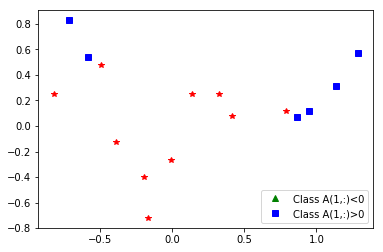

In [56]:
n=10
scenario=3
sigma_A = 0.4
sigma_B = 0.4
X,T,X_val,T_val = generateSubsets(n,scenario,sigma_A,sigma_B,1)
#print(X.shape)

In [43]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.sum(abs(T-Y)/2)/len(T)

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.zeros(W.shape)
    dv = np.zeros(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        weights1.append(W)
        weights2.append(V)
        H,O = forward_pass(X,W,V)
        mse = error_mse(T,O)
        mse_errors.append(mse)
        acc = accuracy(T,O)
        accuracys.append(acc)
        delta_o,delta_h = backward_pass(O,T,H,V,hidden)
        W,V,dw,dv = update_weights(X,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
        #print(H)
        #print("print")
        #print(Y)
    weights1.append(W)
    weights2.append(V)
        
    return weights1, weights2,mse_errors,accuracys


In [44]:
def weights_init_MLP(n_in,n_out,scale,hidden):
    W = scale*np.random.randn(hidden,n_in)
    V = scale*np.random.randn(n_out,hidden+1)
    return W,V

In [45]:
def predict(validation,W,V, classification = True):
        #print(validation)
        #print(W.shape)
        _, prediction = forward_pass(validation,W,V)
        
        return prediction

[[-0.81534625  1.13091291 -1.20799563 -1.0941186  -0.93271554 -1.29288624
   1.05224828  0.769554   -1.07867747 -1.10954647 -0.56866726 -0.96753654
   0.96951267 -0.95160184  1.24829847  1.33347169  1.25649484 -0.57672206
  -0.6823425   0.75328713  0.67167688 -1.17304047 -1.45512121  1.27635063
   1.07957605 -0.74057069  1.13987443  1.11621154 -0.56869478 -0.72210307
   1.13895382 -0.93979412 -1.35058584  1.04948328 -1.06882769 -0.88857269
   0.98775131  1.33240893  0.99009975 -0.89531142  1.12131548  1.25568297
   0.98974068 -0.94139138  0.94065078  0.96694682 -0.97109174  0.71448804
  -1.52522345  1.02799402 -0.1877778  -0.1908857   0.12991779 -0.50849813
  -0.4328576   0.50856778  0.23356499  0.20033102 -0.41170126 -0.25677102
  -0.18460945  0.01314082 -0.03021162 -0.28208081  0.14004424  0.16530088
   0.16846643  0.03745599  0.46817125  0.21071572 -0.26948491  0.66735277
   0.2897212   0.12621178  0.3216785   0.08391752 -0.07070338  0.05837765
  -0.50738435  0.4571548   0.17780009 

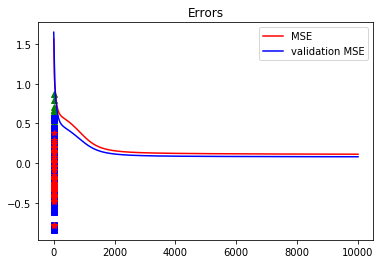

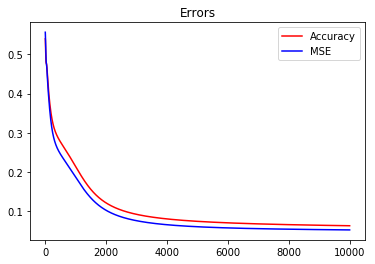

In [47]:
eta = 1e-3
nData = 100
sigma_A = 0.2
sigma_B = 0.3
n_out = 1
scale = 1
#hidden_perceptrons = [2,4,6,8]
hidden_perceptrons = [10,20,40,80]
scenarios = [0,1,2,3]
epochs = 10000
X,T,val_X,val_T = generateSubsets(nData,0,sigma_A,sigma_B,1)

n_in = np.shape(X)[0]

mse_holder = np.zeros((len(hidden_perceptrons),epochs))
mse_val_holder = np.zeros((len(hidden_perceptrons),epochs))
acc_holder = np.zeros((len(hidden_perceptrons),epochs))
acc_val_holder = np.zeros((len(hidden_perceptrons),epochs))

#FOR ALL DIFFERENT NUMBER OF PERCEPTRONS IN HIDDEN LAYER
#for j,nPerceptron in enumerate(hidden_perceptrons):
W,V = weights_init_MLP(n_in,n_out,scale,hidden_perceptrons[0])
W=np.random.randn(hidden_perceptrons[0],np.shape(X)[0])
V=np.random.randn(1,hidden_perceptrons[0]+1)
#W = scale*np.random.randn(hidden_perceptrons,np.shape(X)[0])
#V = scale*np.random.randn(n_out,hidden_perceptrons+1)

#TRAINING
W_train,V_train,mse,acc = backprop(eta,X,T,W,V,hidden_perceptrons[0],epochs)

mse_val = []
acc_val = []
W_train = np.array(W_train)
V_train = np.array(V_train)

#print(W_train[i,:,:].shape)

#PREDICTION
for i in range(1,W_train.shape[0]):
    p = predict(val_X,W_train[i,:,:],V_train[i,:,:])
    mse_val.append(error_mse(val_T,p))
    acc_val.append(accuracy(val_T,p))

"""
mse_holder[j,:] = np.array(mse)
mse_val_holder[j,:] = np.array(mse_val)
acc_holder[j,:] = np.array(acc)
acc_val_holder[j,:] = np.array(acc_val
"""
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt_mse_val, = plt.plot(np.linspace(0,epochs,epochs),mse_val,'b', label='validation MSE')
plt.legend(handles=[plt_mse,plt_mse_val])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
#print(mse_val[8000])
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'r',label='Accuracy')
plt_acc_val, = plt.plot(np.linspace(0,epochs,epochs),acc_val,'b', label='MSE')
plt.legend(handles=[plt_acc,plt_acc_val])
plt.title('Errors')
plt.show()